# What’s Tidy Data?
# How to organize messy datasets in Python with Melt and Pivotable functions

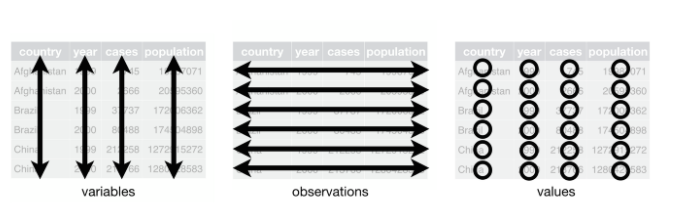

Tidy Data is a way of structuring datasets to facilitate analysis.
In tidy data:
1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each type of observational unit forms a table.

Messy data is any other arrangement of the data.
There are 5 examples of messy data:
* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.
* A single observational unit is stored in multiple tables.

# Information about Dataset

The ultimate Soccer database for data analysis and machine learning
What you get:

* +25,000 matches
* +10,000 players
* 11 European Countries with their lead championship
* Seasons 2008 to 2016
* Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
* Team line up with squad formation (X, Y coordinates)
* Betting odds from up to 10 providers
* Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches
* 16th Oct 2016: New table containing teams' attributes from FIFA !

database.sqlite

* Table	Total Rows	Total Columns
* Country	        11	   2
* League	        11	   3
* Match	          25979	  115
* Player	      11060	   7
* Player_Attributes	183978	42
* Team	             299	5
* Team_Attributes	1458	25



In [1]:
import sqlite3
#SQLite3 is a very easy to use database engine. It is self-contained, serverless, zero-configuration and transactional. 
#It is very fast and lightweight, and the entire database is stored in a single disk file.
#It is used in a lot of applications as internal data storage.The Py.Library includes a module called "sqlite3" intended for working with this database. 

import numpy as np
#NumPy is a python library used for working with arrays.
#It also has functions for working in domain of linear algebra, fourier transform, and matrices.
#We have lists that serve the purpose of arrays, but they are slow.NumPy aims to provide an array object that is up to 50x faster that traditional Python lists.

import pandas as pd 
#Why pandas: you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — 
#a table, basically — then let you do things like:
#Calculate statistics and answer questions about the data, like: What's the average, median, max, or min of each column?
#Does column A correlate with column B?
#What does the distribution of data in column C look like?
#Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
#Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.
#Store the cleaned, transformed data back into a CSV, other file or database

import os
#The OS module in python provides functions for interacting with the operating system.
#This module provides a portable way of using operating system dependent functionality.
#The *os* and *os.path* modules include many functions to interact with the file system.

import matplotlib.pyplot as plt
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
#UTF-8 is a variable-width character encoding standard 
#that uses between one and four eight-bit bytes to represent all valid Unicode code points.

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.       

soccer

/kaggle/input/soccer/database.sqlite


In [2]:
con = sqlite3.connect("/kaggle/input/soccer/database.sqlite")
data = pd.read_sql_query('SELECT * from League, Country,Team', con)
data.head()

,id,country_id,name,id,name,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,Belgium Jupiler League,1,Belgium,1,9987,673.0,KRC Genk,GEN
1,1,1,Belgium Jupiler League,1,Belgium,2,9993,675.0,Beerschot AC,BAC
2,1,1,Belgium Jupiler League,1,Belgium,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,1,1,Belgium Jupiler League,1,Belgium,4,9994,2007.0,Sporting Lokeren,LOK
4,1,1,Belgium Jupiler League,1,Belgium,5,9984,1750.0,KSV Cercle Brugge,CEB
